# Introduction to ML - Binary Logistic Regression Example for Beginners

## Tutorial Overview:

1. What is Machine Learning
2. Process of Machine Learning
3. Problem Formulation
4. Loading the Raw Data
5. Data Preprocessing
    - EDA
    - Data Cleaning
    - Feature Selection
6. Splitting the Raw Data
7. What is Logistic Regression Analysis
8. Running Logistic Regression
9. Evaluating the Model
10. Hyper Parameter Tuning
11. Final Model with Selected Parameters
12. How to use our L. Regression model

### 1. What is Machine Learning (ML) in a nutshell
- “Machine learning is the science (and art) of programming computers so they can learn from data” by Aurélien Géron book (Hands-On Machine Learning with Scikit-Learn and TensorFlow)


- ML uses statistical models and algorithms to perform tasks like predictions & classifications without explicit instructions


- ML is a subset of Artificial Intelligence

### 2. Machine Learning Process


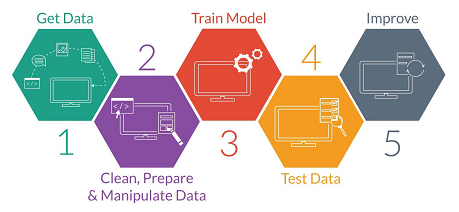

### 3. Problem Formulation

- In this example, we want to investigate "what factors/variables affect a good or a bad loan"
- Make predictions whether a customer should get its loan approved or not based on their characteristics
- Hence our Dependent variable (y) is the Loan Approval (Yes/No) or if the Loan is Good or Bad

### Importing / Installing packages

In [ ]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

# import sys
# !conda list Check the packages installed

### 4. Loading the Raw Data

In [ ]:
# Loading the data
raw_data = pd.read_csv('F:\\Github\\Python tutorials\\Introduction to ML - Logistic Regression\\Logistic Regression Dummy Data v3.csv')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head(5)

(1006, 14)


,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


## 5. Data Preprocessing

### 5.1. Exploratory Data Analysis

In [ ]:
# Checking for null values

raw_data.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [ ]:
# Visualize the NULL observations

raw_data[raw_data['Employment History'].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Deleting the NULL values
raw_data = raw_data.dropna(subset = ['Employment History'])

# Printing the shape
print(raw_data.shape)

# Visualize the NULL observations
raw_data.isnull().sum()

(1001, 14)


Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

In [ ]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_values = np.unique(raw_data[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature Type of Account is: 4 -- ['No Data' 'Type A' 'Type B' 'Type C']
The number of values for feature Account History is: 3 -- ['Average (known delays)' 'Good' 'critical']
The number of values for feature Reason for the Loan is: 10 -- ['Advance Edu/training' 'All other' 'Buying a New Car' 'Buying a Used Car'
 'Home Devices' 'Home furniture' 'Learning / Edu purposes' 'Renovation'
 'Support for Business' 'TV']
The number of values for feature Loan Amount is: 911
The number of values for feature Account Savings is: 5 -- ['0-200' '1000+' '200-500' '500-1000' 'No Data']
The number of values for feature Employment History is: 5 -- ['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
The number of values for feature Individual Stauts is: 5 -- ['Divorced' 'Female' 'Female_' 'Male' 'Married']
The number of values for feature Other Loans is: 2 -- ['No' 'Yes']
The number of values for feature Security / Collateral is: 4 -- ['No Security' 'Property - Real Estat

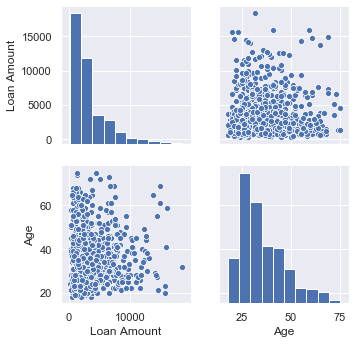

In [ ]:
# Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data)

# Notes: Do not run this on a big dataset. Filter the columns first

### 5.2. Data Cleaning

In [ ]:
# Deleting the outlier

raw_data = raw_data[raw_data['Age'] < 100]

raw_data.shape

(1000, 14)

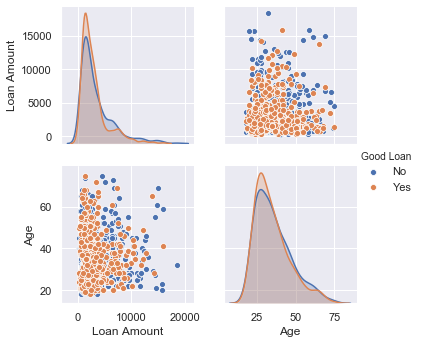

In [ ]:
# Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data, hue = 'Good Loan')


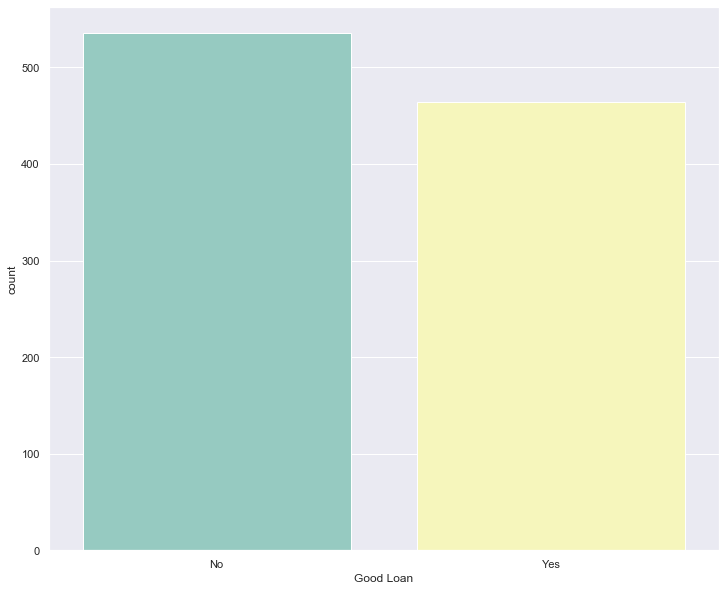

In [ ]:
# Investigating the distr of y

sns.countplot(x = 'Good Loan', data = raw_data, palette = 'Set3')

In [ ]:
raw_data.columns

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

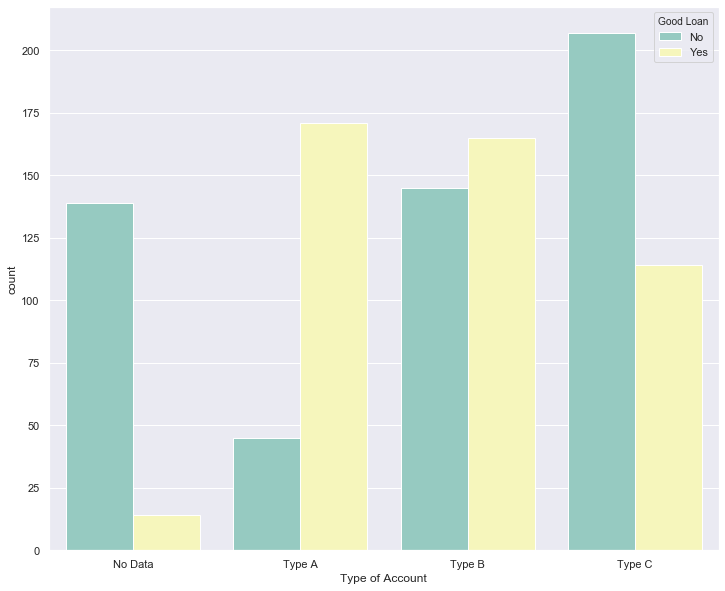

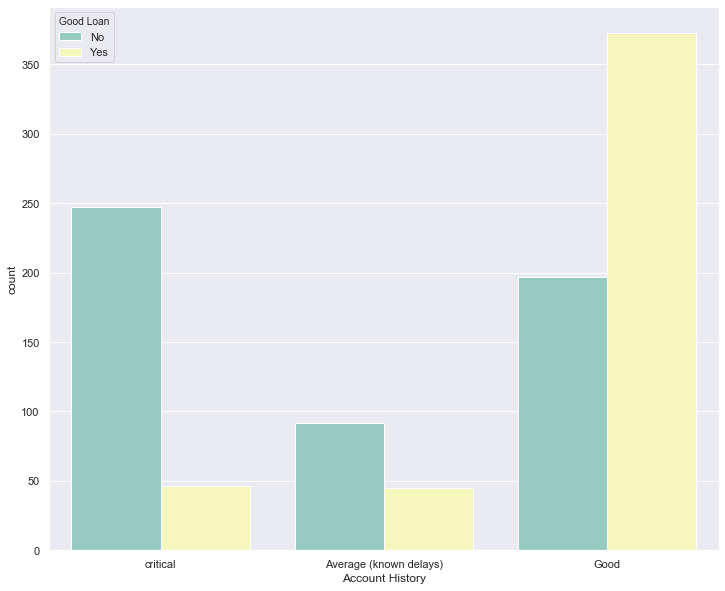

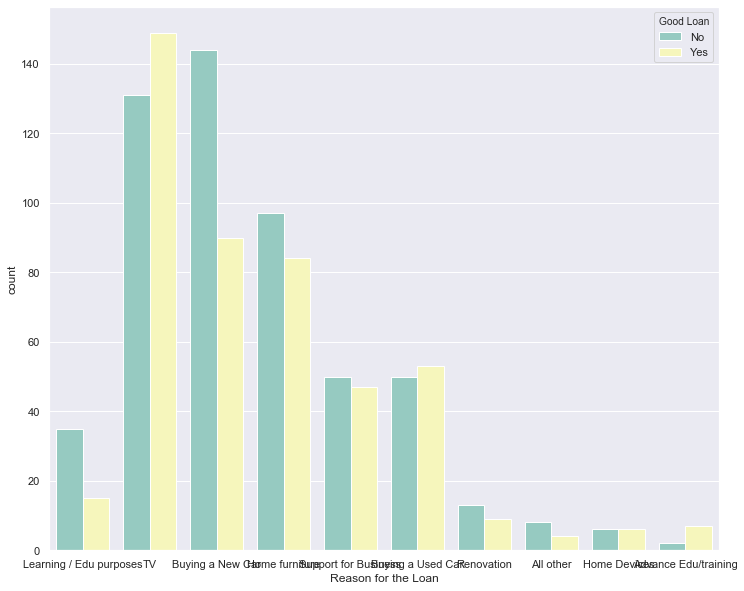

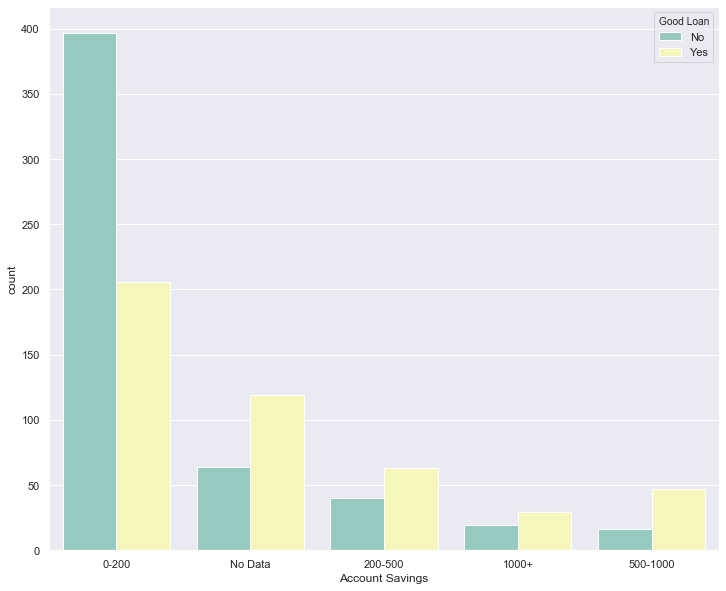

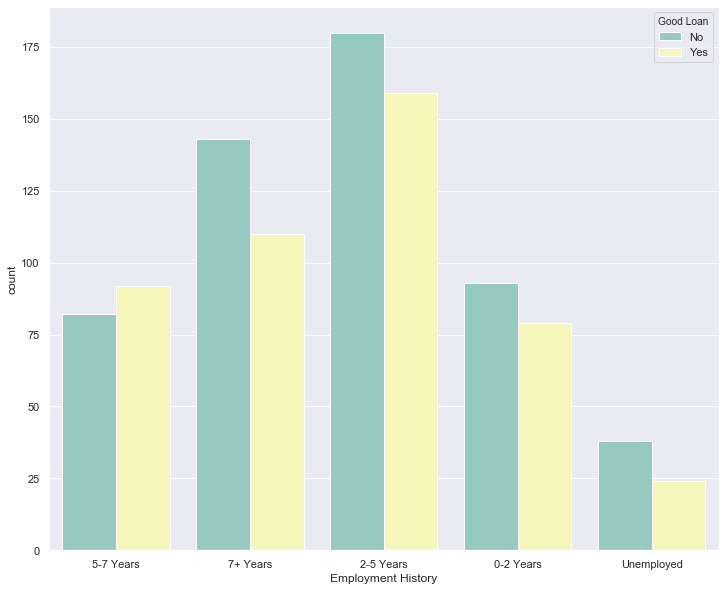

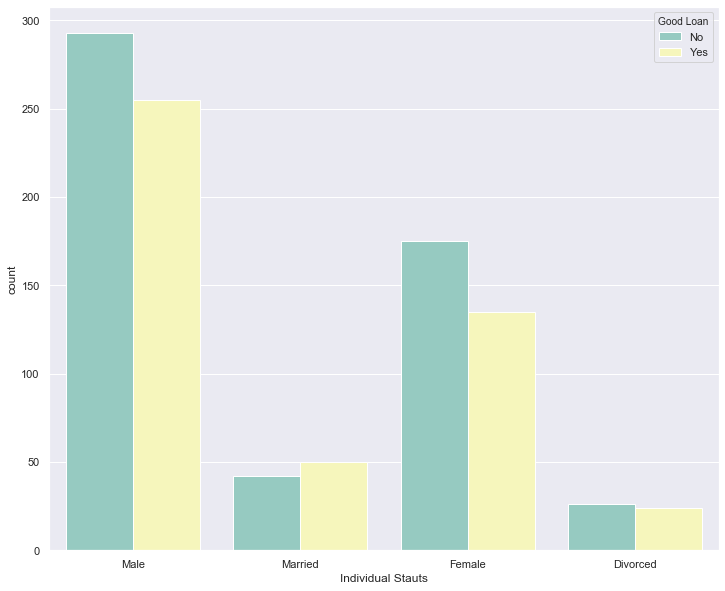

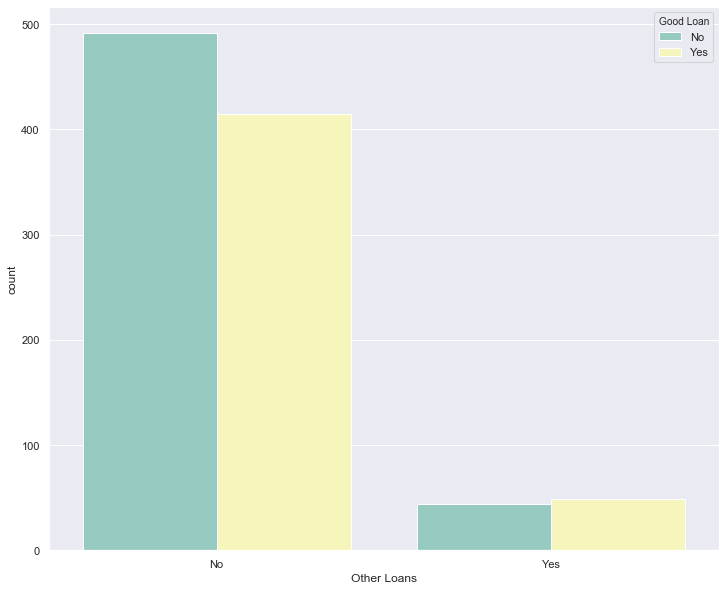

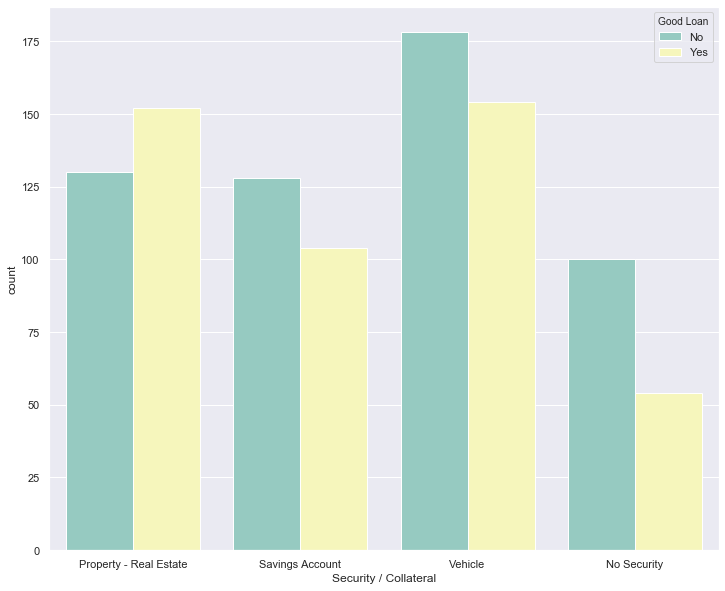

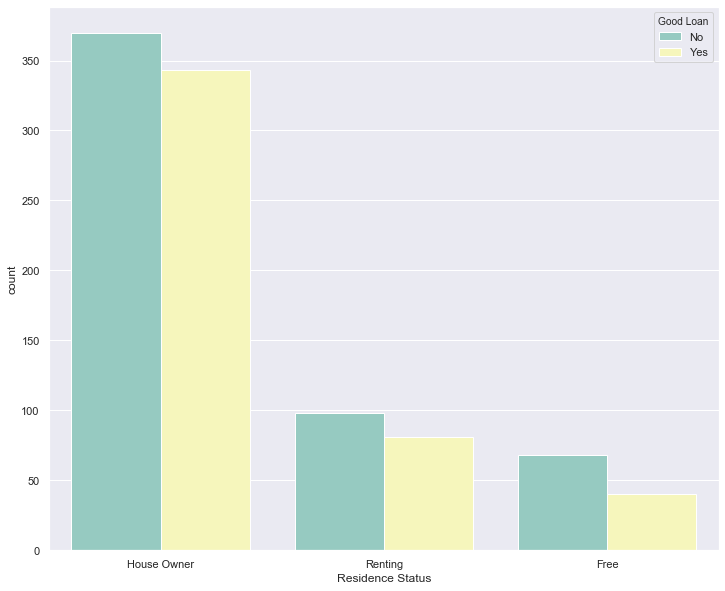

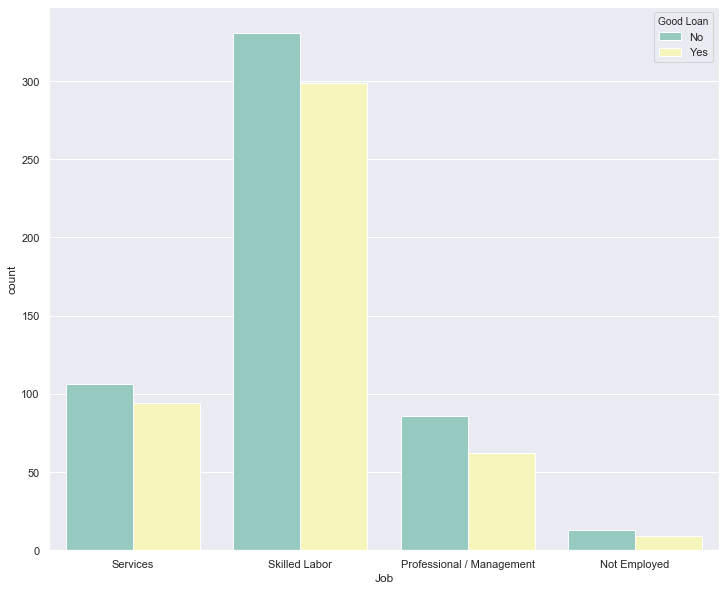

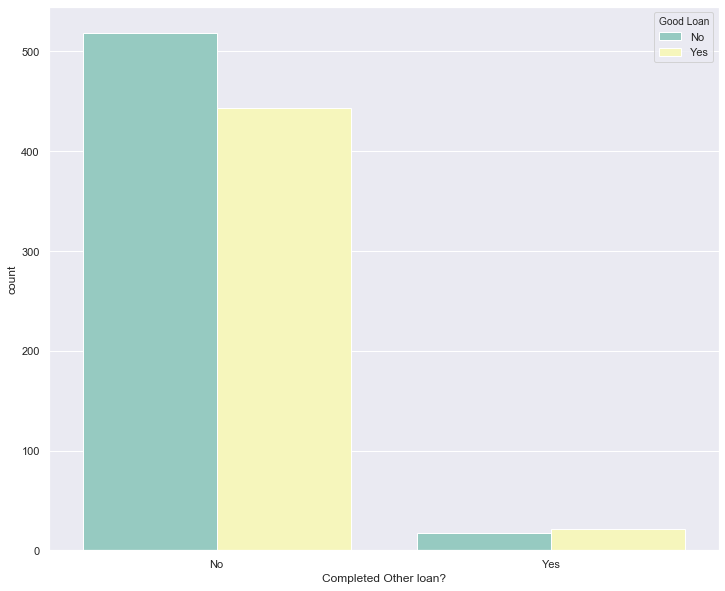

In [ ]:
# Looping through all the features by our y variable - see if there is relationship

features = ['Type of Account', 'Account History', 'Reason for the Loan',
       'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set3', hue = 'Good Loan')
    plt.show()

In [ ]:
raw_data.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [ ]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(raw_data.shape)
# print the shape
print(new_raw_data.shape)

# Creating a new 0-1 y variable
#new_raw_data['Loan Approved2'] = 0
new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'Yes'] = 1
new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'No'] = 0

# Visualizing the data
new_raw_data

(1000, 14)
(1000, 49)


C:\Users\pitsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pitsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
5,6130.0,30.0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
6,1394.0,37.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0
7,7242.0,41.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
8,9581.0,31.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
9,734.0,44.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


#### Notes:

###### We do not need to normalize / standardize the data in Logistic Regression due to the logistic function (0 or 1)
###### Once a value crosses the decision boundary (0.5 threshold), it saturates
###### After the 0.5 or before, there is no additional value to be added from smaller or larger values
###### more details: https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

## 5.3. Feature Selection
In this example, we do not have many variables so we might use all of the data but in some cases, you have thousands of variables and you will need to filter them in order to save computational time

#### Steps of Running Feature Importance
- Split the data into X & y
- Run a Tree-based estimators (i.e. decision trees & random forests) 
- Run Feature Importance

In [ ]:
# Split the data into X & y

X = new_raw_data.drop('Good Loan', axis = 1).values
y = new_raw_data['Good Loan']

y = y.astype(int)

print(X.shape)
print(y.shape)

(1000, 48)
(1000,)


In [ ]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

# If you want to learn how Decesion Trees work, read here: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=15, splitter='best')

#### Notes:
- The importance of a feature is calculated as the (normalized) total reduction of entropy (other criterions too) brought by that feature or the higher information gain
- To understand the maths, read this: https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

In [ ]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(new_raw_data.drop('Good Loan', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for Loan Amount is : 0.12122079844891431
The feature importance for Age is : 0.07962988068108864
The feature importance for Type of Account_No Data is : 0.054236275712355064
The feature importance for Type of Account_Type A is : 0.04973253970745607
The feature importance for Type of Account_Type B is : 0.0
The feature importance for Type of Account_Type C is : 0.026698167265803152
The feature importance for Account History_Average (known delays) is : 0.0026219295620499047
The feature importance for Account History_Good is : 0.19131616315491018
The feature importance for Account History_critical is : 0.0
The feature importance for Reason for the Loan_Advance Edu/training is : 0.0
The feature importance for Reason for the Loan_All other is : 0.0
The feature importance for Reason for the Loan_Buying a New Car is : 0.012188194319512301
The feature importance for Reason for the Loan_Buying a Used Car is : 0.00657340597791024
The feature importance for Reason for the L

In [ ]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:40]

fi_df

,index,Feature,Feature Importance
0,19,Account Savings_0-200,0.197515
1,7,Account History_Good,0.191316
2,0,Loan Amount,0.121221
3,1,Age,0.079630
4,2,Type of Account_No Data,0.054236
5,3,Type of Account_Type A,0.049733
6,5,Type of Account_Type C,0.026698
7,45,Job_Skilled Labor,0.020597
8,34,Other Loans_Yes,0.017520
9,23,Account Savings_No Data,0.016471


#### Notes:
- Please note that we have not normalised / scale our data
- Please note that we have not done any feature engineering - created new features
- Please note that we have not joined multiple datasets together
- Please note that we have not aggregated any of our data

## 6. Splitting the Raw Data - Hold-out validation

In [ ]:
# Print the shapes

print(new_raw_data.shape)
print(new_raw_data[columns_to_keep].shape)

# new_raw_data = new_raw_data[columns_to_keep]

(1000, 49)
(1000, 40)


In [ ]:
new_raw_data.head()

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
# Split the data into X & y

X = new_raw_data[columns_to_keep].values
X

y = new_raw_data['Good Loan']
y = y.astype(int)
y

print(X.shape)
print(y.shape)

(1000, 40)
(1000,)


In [ ]:
# Hold-out validation

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(720, 40)
(200, 40)
(80, 40)
(720,)
(200,)
(80,)


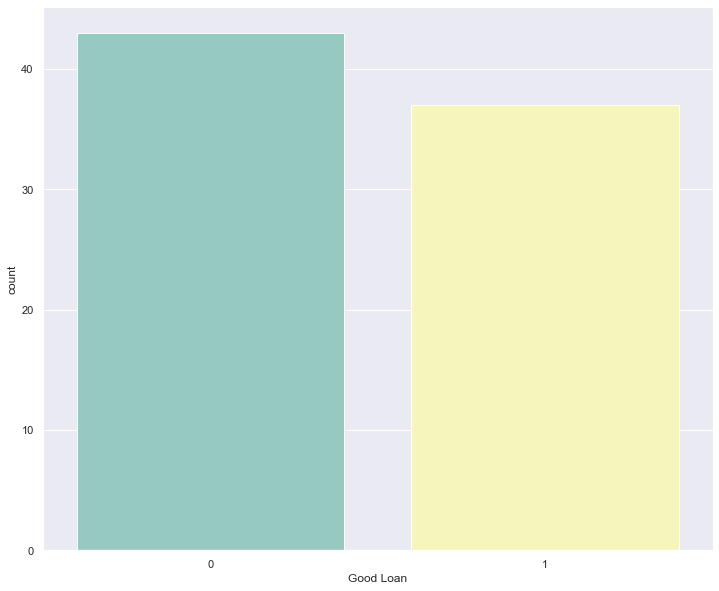

In [ ]:
# Investigating the distr of all ys

ax = sns.countplot(x = y_valid, palette = "Set3")

## 7. What is Logistic Regression 

- Famous statistical method for predicting two or more binary classes; not continues numbers. 
- Hence, Logistic regression is used for classification problems
- To make it work, we transform our linear regression line into a logistic regression curve so we can get a good fit of our data (see pics below) 

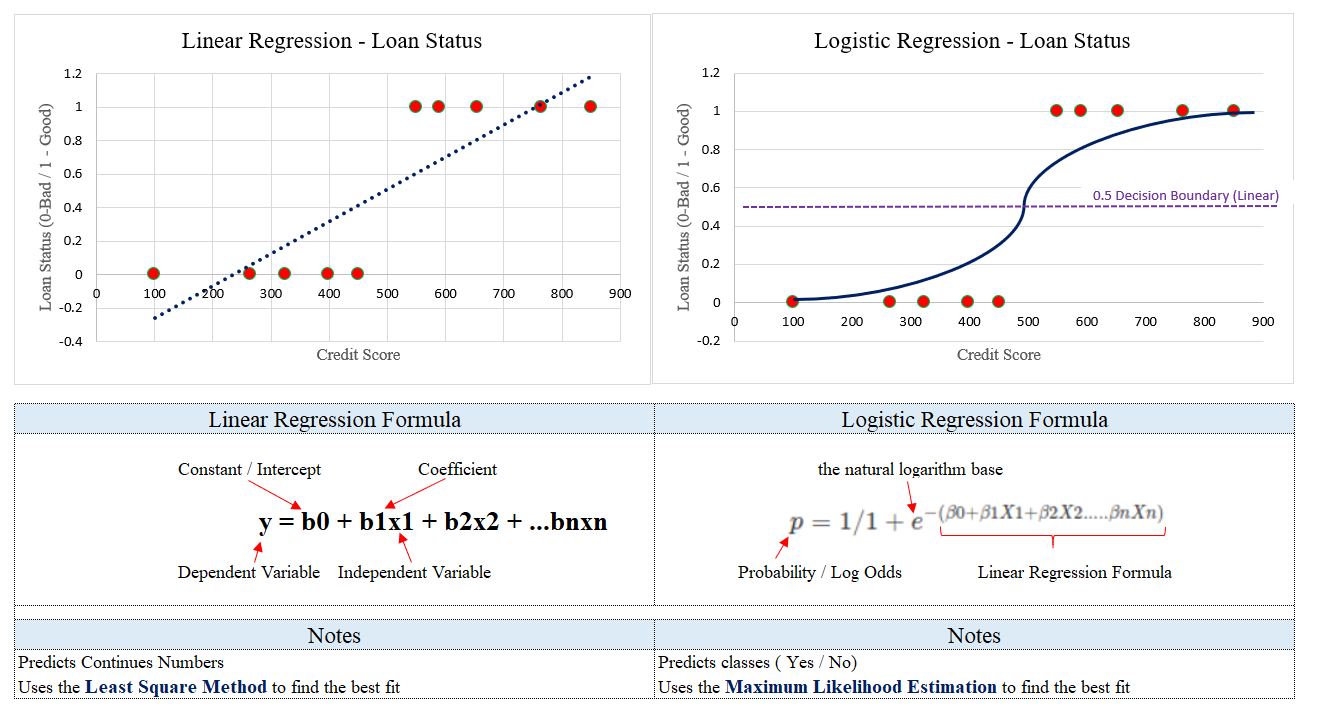

In [ ]:
### Graphical

PATH = "F:\\Github\\Python tutorials\\Introduction to ML - Logistic Regression\\"
Image(filename = PATH + "Logistic1.png", width=900, height=900)

### How it works:
 
- We fit an "S" Shape logistic Function
- The curve tells you the porbability if a loan is good or bad
- If we have a high Credit score, there is a high probability that it's a good loan


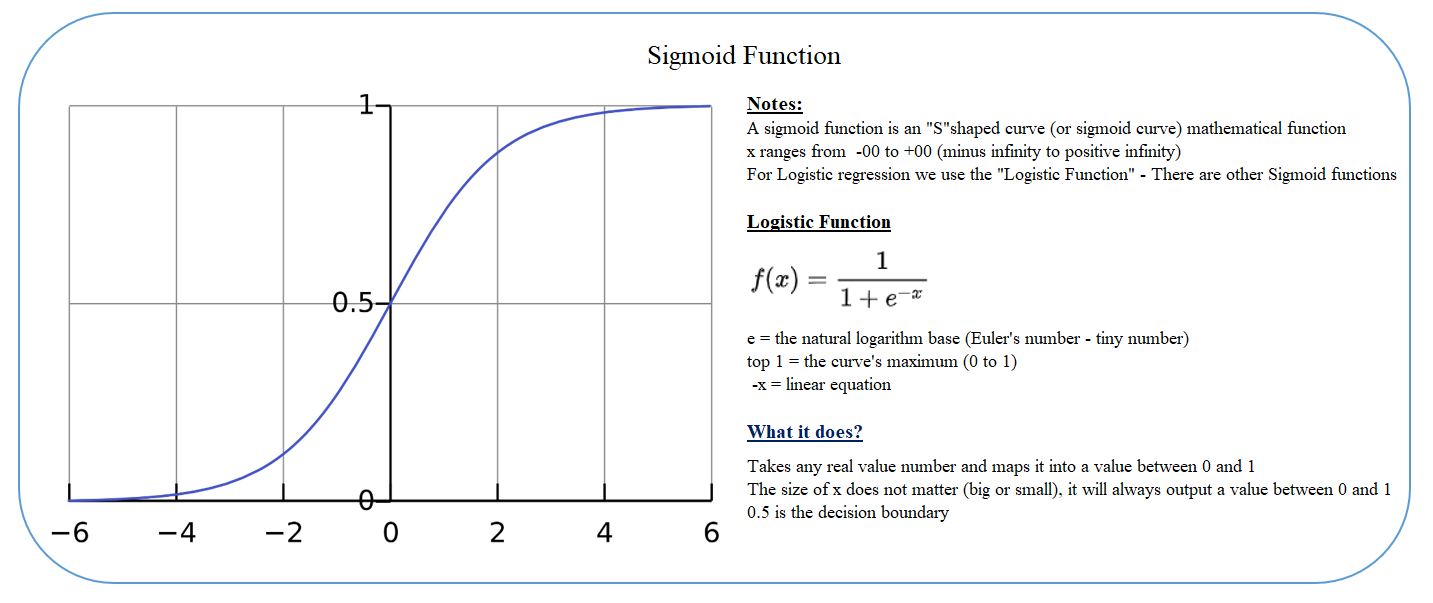

In [ ]:
### Graphical

PATH = "F:\\Github\\Python tutorials\\Introduction to ML - Logistic Regression\\"
Image(filename = PATH + "Logistic2.png", width=900, height=900)

#### How Maximum likelihood works

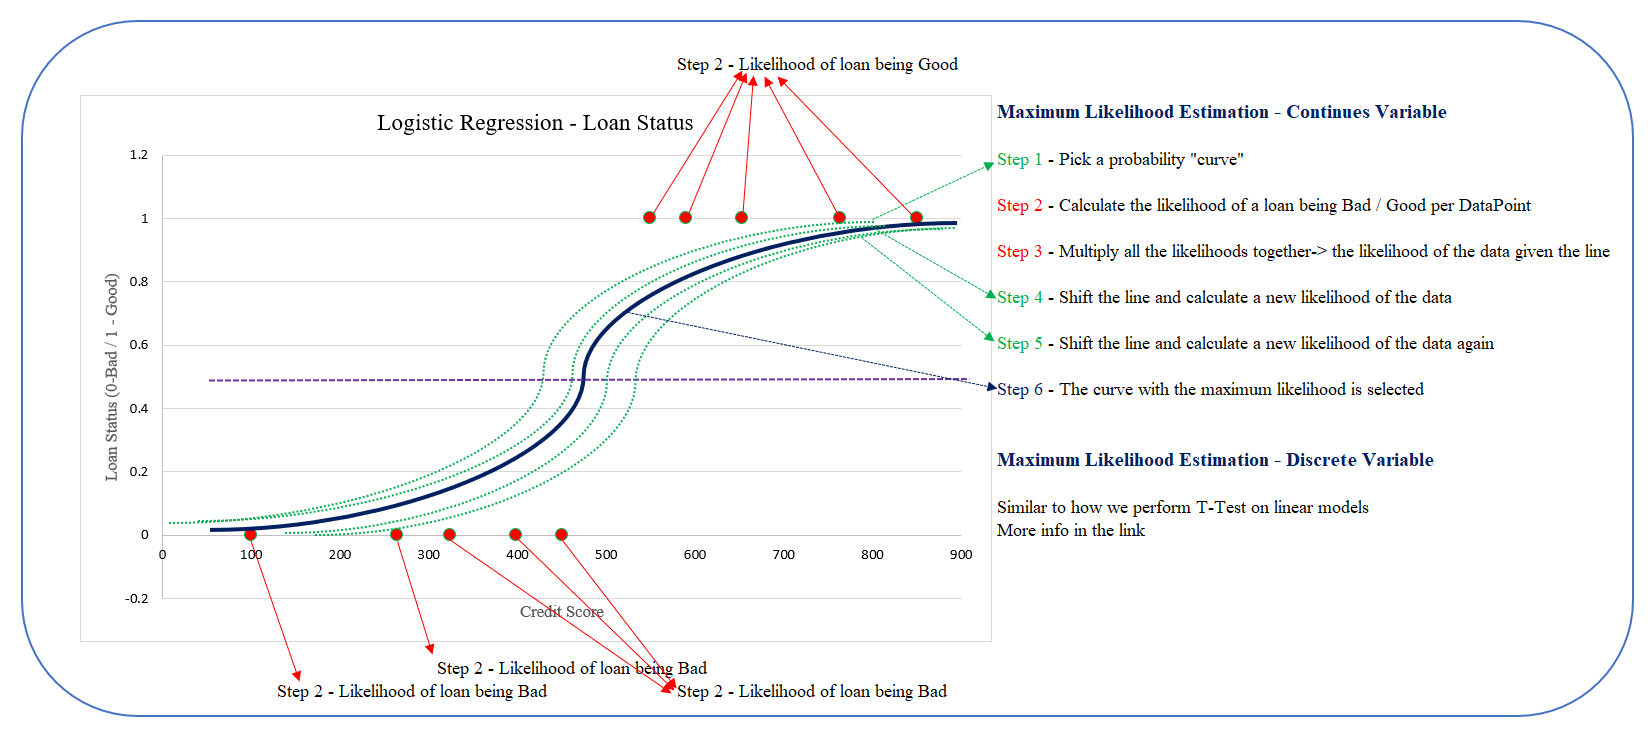

In [ ]:
### Graphical

PATH = "F:\\Github\\Python tutorials\\Introduction to ML - Logistic Regression\\"
Image(filename = PATH + "Logistic3.png", width=900, height=900)

In [ ]:
# Link for Discrete Variables: https://youtu.be/vN5cNN2-HWE

## 8. Running Logistic Regression

In [ ]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)

# SKLearn doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[-1.414415, 1.895515, -0.000124, 0.006603, -1.451759, 0.971756,
        -0.191489, -0.089067, 0.258480, 0.529939, 0.161084, 0.050142,
        0.239664, 0.442354, -0.690158, -0.117224, 0.041737, -0.451682,
        0.313925, 0.169194, -0.379968, 0.034117, -0.170529, 0.508263,
        -0.135459, 0.013961, 0.392004, 0.047327, -0.036950, 0.365566,
        0.127444, -0.242493, 0.132442, -0.278851, 0.101799, -0.066592,
        -0.001908, -0.259929, 0.112389, -0.114838]])

## 9. Evaluating the Model

In [ ]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))



The Training Accuracy is:  0.7791666666666667
The Testing Accuracy is:  0.75
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       387
           1       0.77      0.75      0.76       333

    accuracy                           0.78       720
   macro avg       0.78      0.78      0.78       720
weighted avg       0.78      0.78      0.78       720



In [ ]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

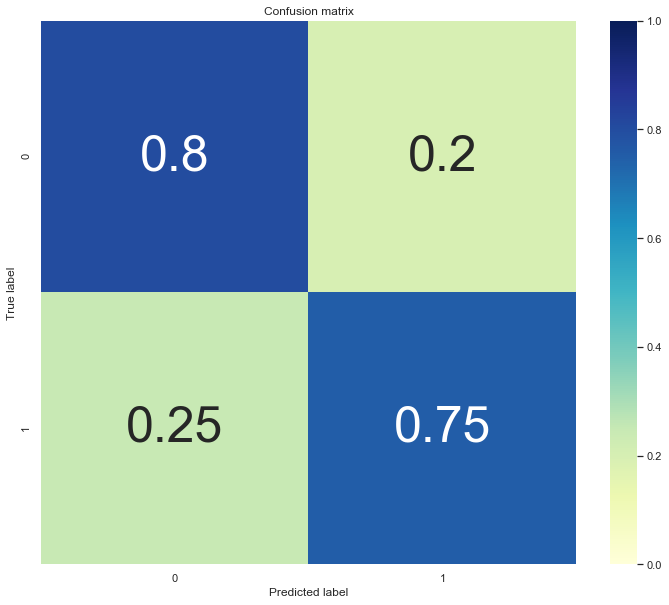

In [ ]:
# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [ ]:
log_reg.classes_

array([0, 1])

In [ ]:
cm.sum(axis=1)
cm_norm

array([[0.803618, 0.196382],
       [0.249249, 0.750751]])

In [ ]:
cm

array([[311,  76],
       [ 83, 250]], dtype=int64)

In [ ]:
cm.sum(axis=0)

array([394, 326], dtype=int64)

In [ ]:
np.diag(cm)

array([311, 250], dtype=int64)

In [ ]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)


The True Positive Rate is: [0.803618 0.750751]
The Precision is: [0.789340 0.766871]
The False positive rate is: [0.249249 0.196382]
The False Negative Rate is:  [0.196382 0.249249]

The average TPR is: 0.7771841609050911
The average Precision is: 0.7781056335835073
The average False positive rate is: 0.22281583909490887
The average False Negative Rate is: 0.22281583909490887


#### Logarithmic loss - or Log Loss - or cross-entropy loss

- Log Loss is an error metric
- This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions. 

- Why it's important? For example, imagine having 2 models / classifiers that both predict one observation correctly (Good Loan). However, 1 classifier has a predicted probability of 0.54 and the other 0.95. Which one will you choose? Classification Accuracy will not help here as it will get both on 100%

- Doc: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

In [ ]:
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))


The Log Loss on Training is:  0.45612184723876653
The Log Loss on Testing Dataset is:  0.49358753587188703


## 10. Hyper Parameter Tuning

- We will loop over parameter C (Inverse of regularization strength).
- Inverse of regularization strength helps to avoid overfitting - it penalizes large values of your parameters
- It also helps to find Global Minimum by moving to better "solutions" from local minimum to global minimum
- The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e5

In [ ]:
np.geomspace(1e-5, 1e5, num=20)

array([0.000010, 0.000034, 0.000113, 0.000379, 0.001274, 0.004281,
       0.014384, 0.048329, 0.162378, 0.545559, 1.832981, 6.158482,
       20.691381, 69.519280, 233.572147, 784.759970, 2636.650899,
       8858.667904, 29763.514416, 100000.000000])

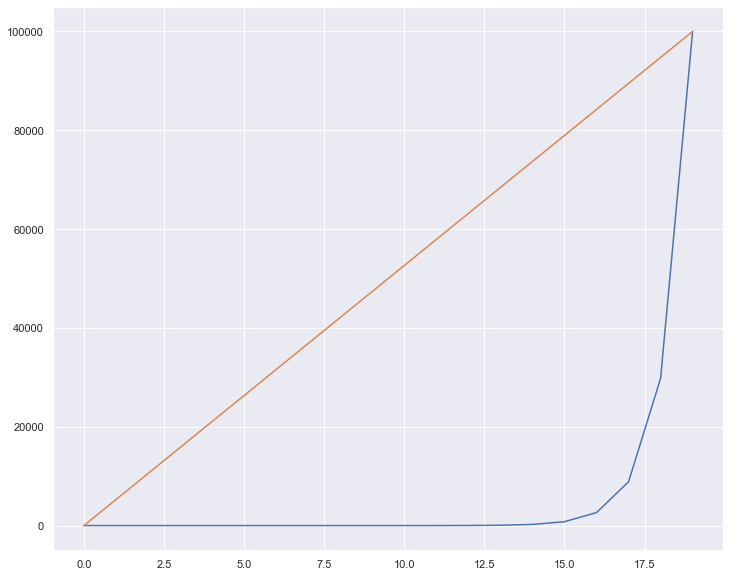

In [ ]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace


In [ ]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

The CA of C parameter 1e-05 is 0.535:
The Logg Loss of C parameter 1e-05 is 0.6962402407703648:

The CA of C parameter 3.359818286283781e-05 is 0.54:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.6942639549968314:

The CA of C parameter 0.00011288378916846884 is 0.54:
The Logg Loss of C parameter 0.00011288378916846884 is 0.6927526308140248:

The CA of C parameter 0.000379269019073225 is 0.545:
The Logg Loss of C parameter 0.000379269019073225 is 0.6875079443809536:

The CA of C parameter 0.0012742749857031334 is 0.64:
The Logg Loss of C parameter 0.0012742749857031334 is 0.6714766139169166:

The CA of C parameter 0.004281332398719391 is 0.67:
The Logg Loss of C parameter 0.004281332398719391 is 0.6329923109490696:

The CA of C parameter 0.01438449888287663 is 0.725:
The Logg Loss of C parameter 0.01438449888287663 is 0.5733419963623799:

The CA of C parameter 0.04832930238571752 is 0.705:
The Logg Loss of C parameter 0.04832930238571752 is 0.5223217618238527:

The CA of C pa

C:\Users\pitsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pitsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pitsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pitsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pitsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

In [ ]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,15,784.759970,0.775,0.487454
1,12,20.691381,0.770,0.493078
2,16,2636.650899,0.770,0.493193
3,18,29763.514416,0.770,0.493202
4,13,69.519280,0.770,0.493222
5,17,8858.667904,0.770,0.493227
6,19,100000.000000,0.770,0.493259
7,9,0.545559,0.745,0.493521
8,10,1.832981,0.750,0.493551
9,11,6.158482,0.760,0.494075


In [ ]:
# Another way of doing the above
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(X_train, y_train)
print("The CA is:", Log_reg3.score(X_test, y_test))
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)



# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

C:\Users\pitsi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The CA is: 0.76
The Logistic Loss is:  0.4931749066693269
The optimal C parameter is:  [0.545559]


### K-fold cross validation:
Advantage: K-fold cross validation uses all the training data to train the model, by applying k different splits; repeated train-test splits converge to the true accuracy given that the training data is representable for the underlying distribution; however in practise this is often overoptimistic.
Disadvantage: The disadvantage of this method is that the training algorithm has to be rerun from the beginning k times, which means it takes k times as much computation to get an evaluation. Additionally, if you want to test the performance on a completely new dataset that the algorithm has never seen, you cannot do this with k-fold cross validation.

### Hold-out:
Advantage: The advantage of Hold-out is that you can test how your model performs on completely unseen data that you haven't used when training the model. Additionally, Hold-out is usually much faster and less computationally expensive. 
Disadvantage: The evaluation may depend heavily on which data points end up in the training set and which end up in the test set, and thus the evaluation may be significantly different depending on how the division is made.

The CA of C parameter 1e-05 is 0.535:
The Logg Loss of C parameter 1e-05 is 0.6962402407703648:



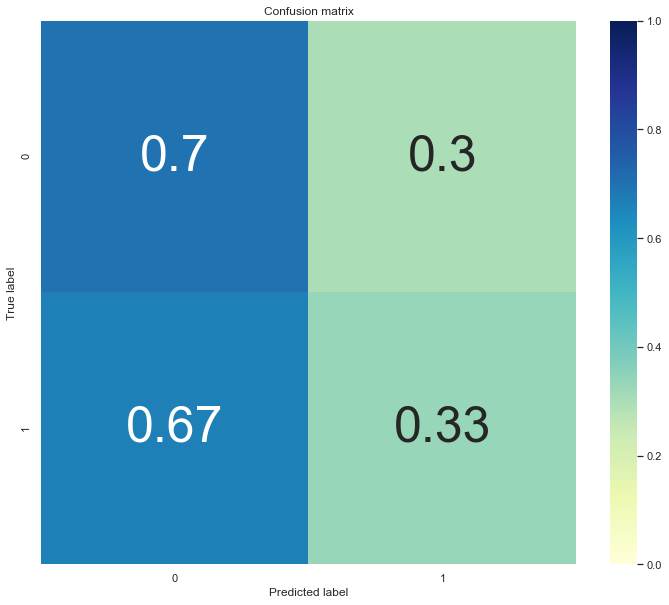

The CA of C parameter 3.359818286283781e-05 is 0.54:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.6942639549968314:



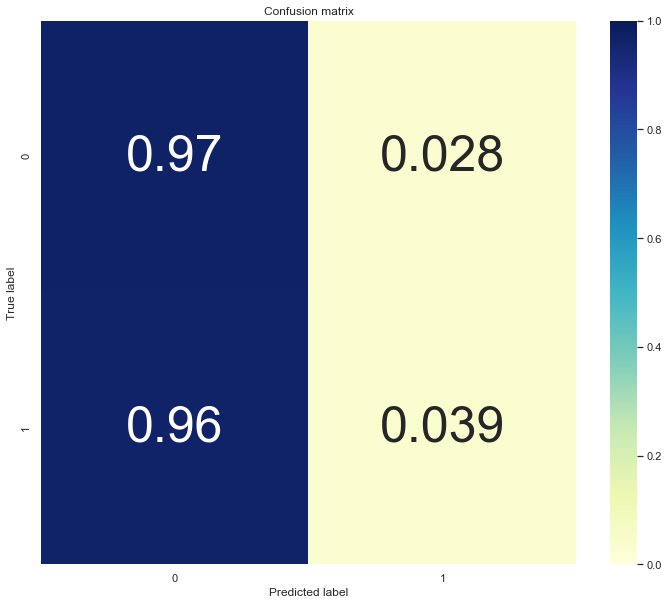

The CA of C parameter 0.00011288378916846884 is 0.54:
The Logg Loss of C parameter 0.00011288378916846884 is 0.6927526308140248:



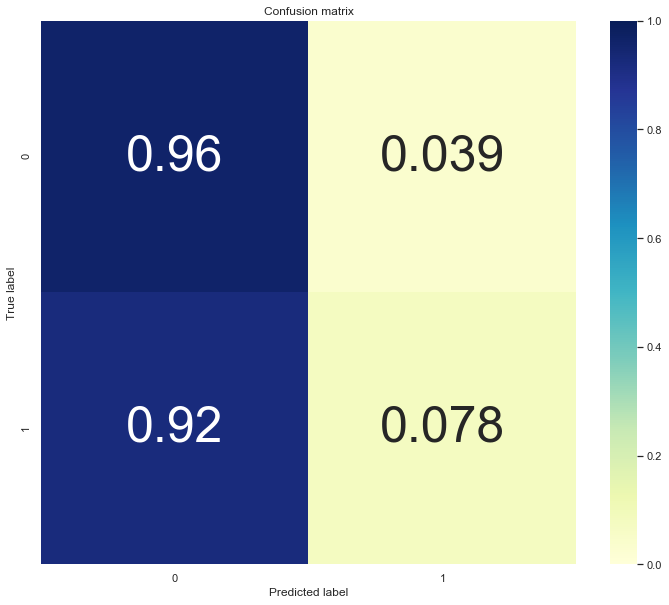

The CA of C parameter 0.000379269019073225 is 0.545:
The Logg Loss of C parameter 0.000379269019073225 is 0.6875079443809536:



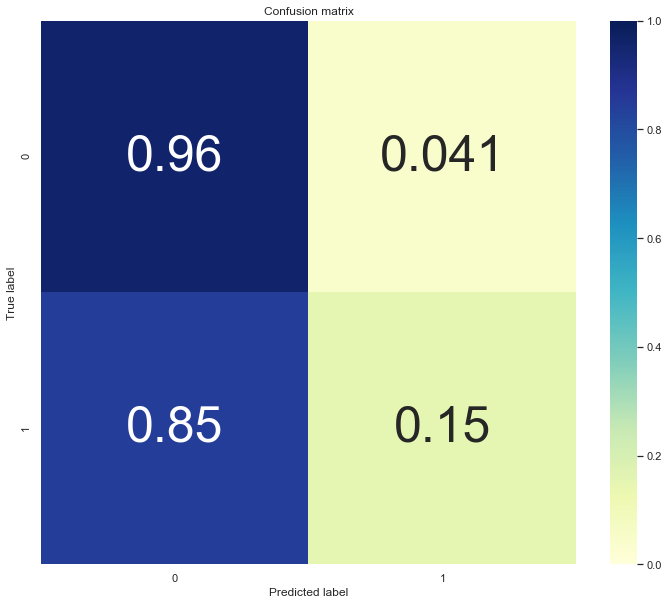

The CA of C parameter 0.0012742749857031334 is 0.64:
The Logg Loss of C parameter 0.0012742749857031334 is 0.6714766139169166:



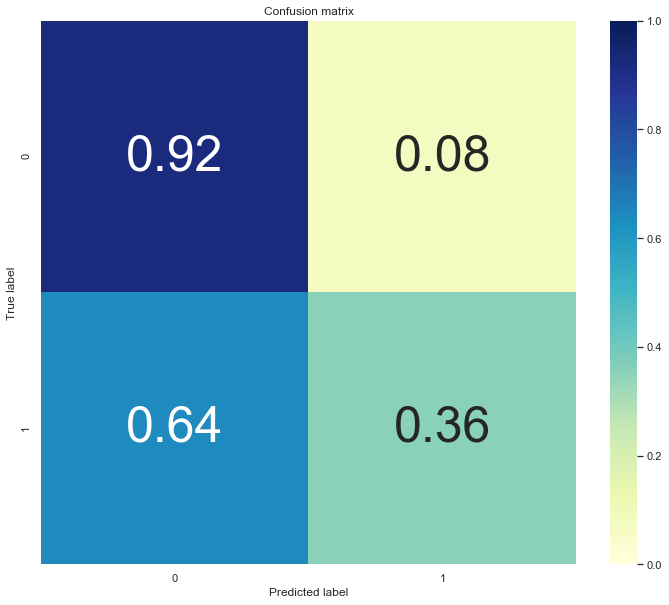

The CA of C parameter 0.004281332398719391 is 0.67:
The Logg Loss of C parameter 0.004281332398719391 is 0.6329923109490696:



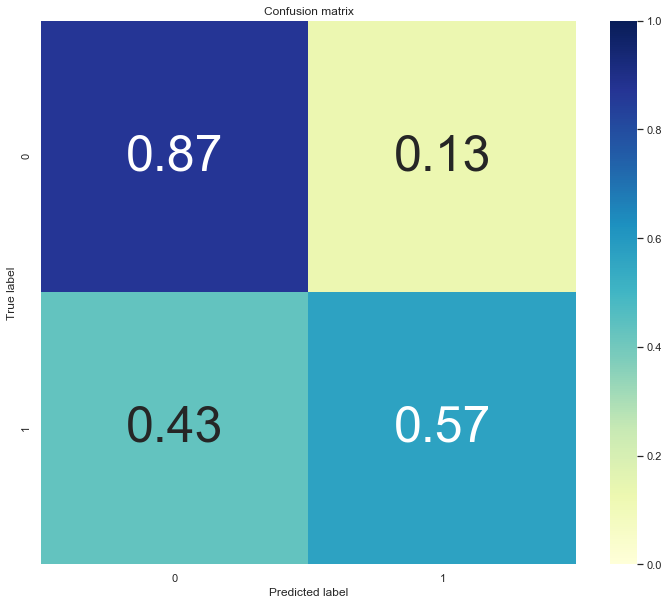

The CA of C parameter 0.01438449888287663 is 0.725:
The Logg Loss of C parameter 0.01438449888287663 is 0.5733419963623799:



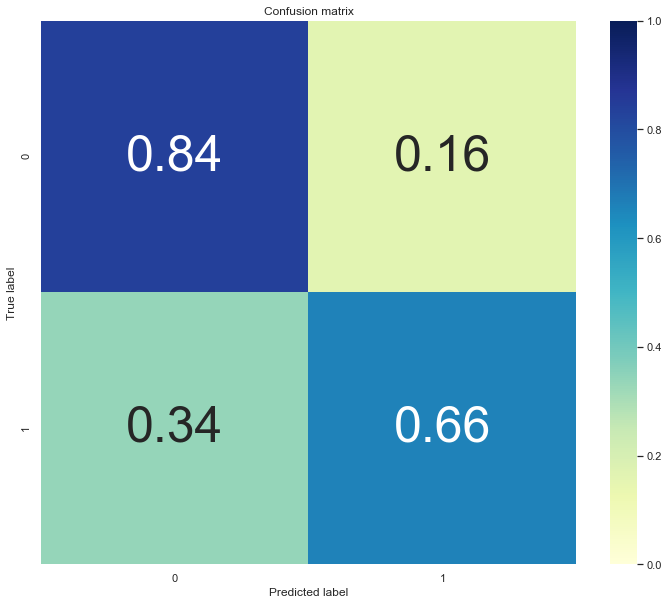

The CA of C parameter 0.04832930238571752 is 0.705:
The Logg Loss of C parameter 0.04832930238571752 is 0.5223217618238527:



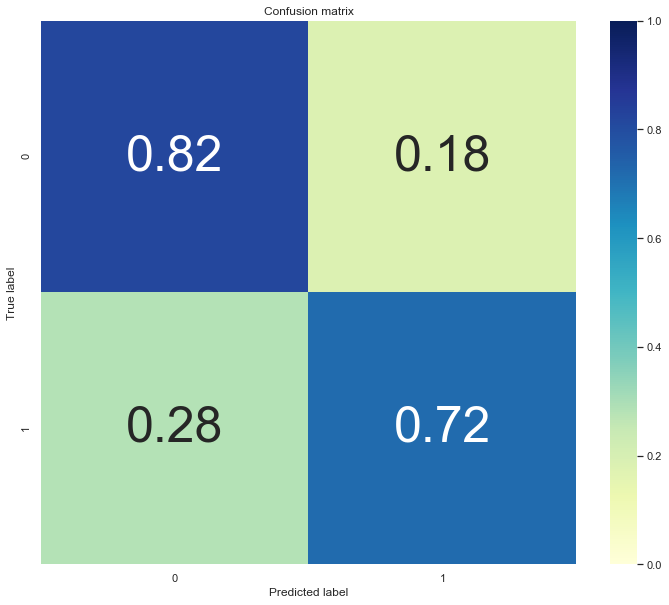

The CA of C parameter 0.1623776739188721 is 0.745:
The Logg Loss of C parameter 0.1623776739188721 is 0.49871561227234507:



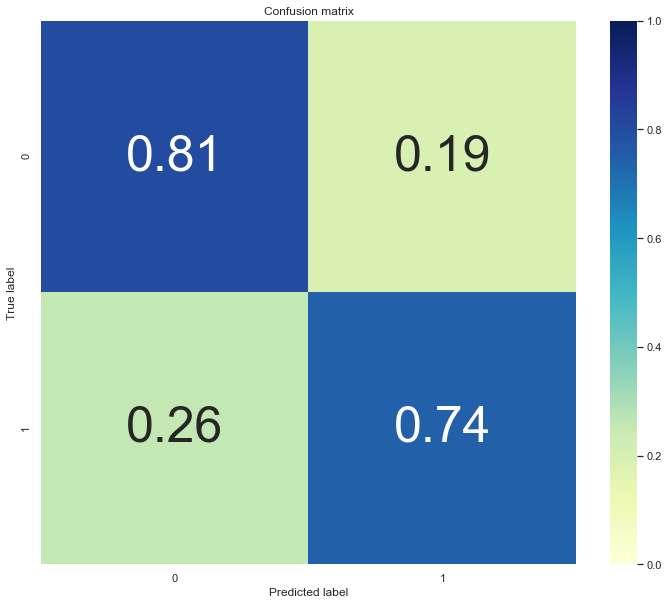

The CA of C parameter 0.5455594781168515 is 0.745:
The Logg Loss of C parameter 0.5455594781168515 is 0.49352070108480717:



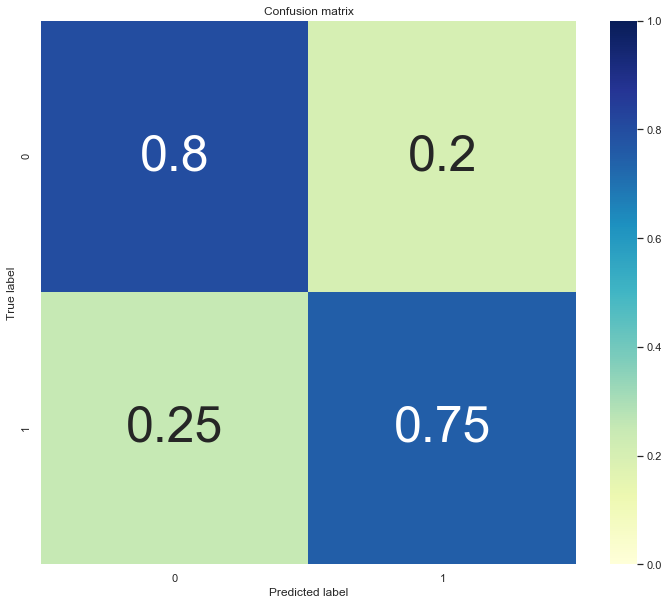

The CA of C parameter 1.8329807108324339 is 0.75:
The Logg Loss of C parameter 1.8329807108324339 is 0.493550921976426:



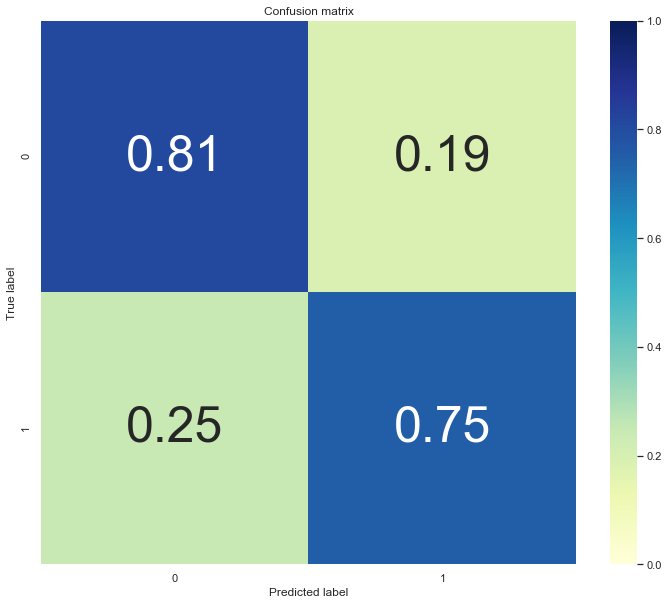

C:\Users\pitsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


The CA of C parameter 6.1584821106602545 is 0.76:
The Logg Loss of C parameter 6.1584821106602545 is 0.494075328518724:



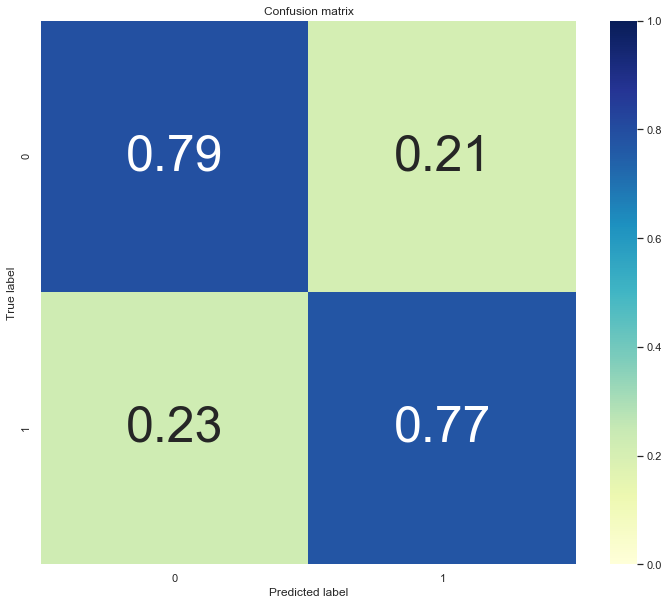

The CA of C parameter 20.6913808111479 is 0.77:
The Logg Loss of C parameter 20.6913808111479 is 0.49307821728688467:



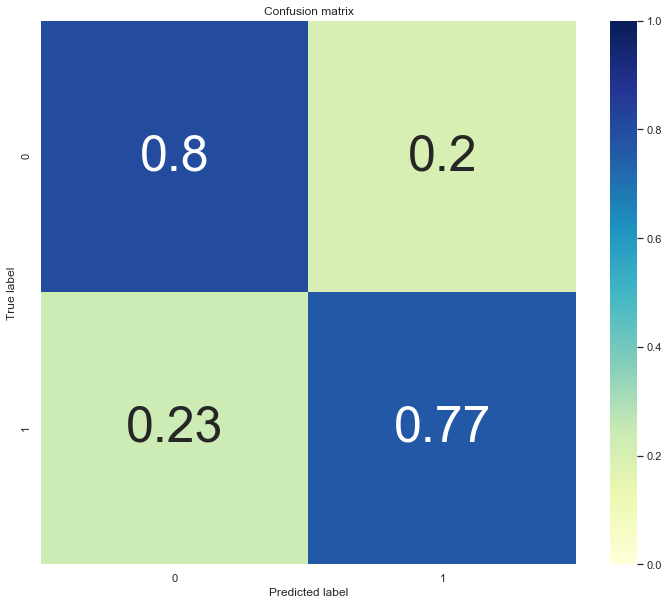

The CA of C parameter 69.51927961775606 is 0.77:
The Logg Loss of C parameter 69.51927961775606 is 0.4932220730622833:



C:\Users\pitsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


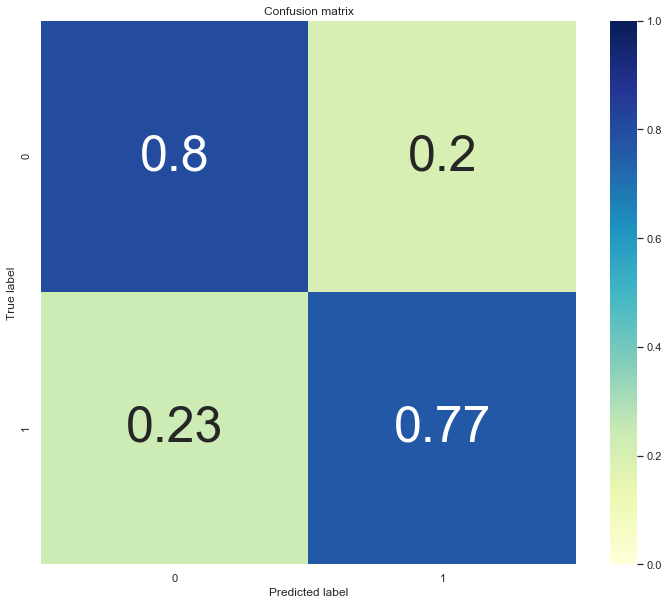

The CA of C parameter 233.57214690901213 is 0.755:
The Logg Loss of C parameter 233.57214690901213 is 0.4941455854485305:



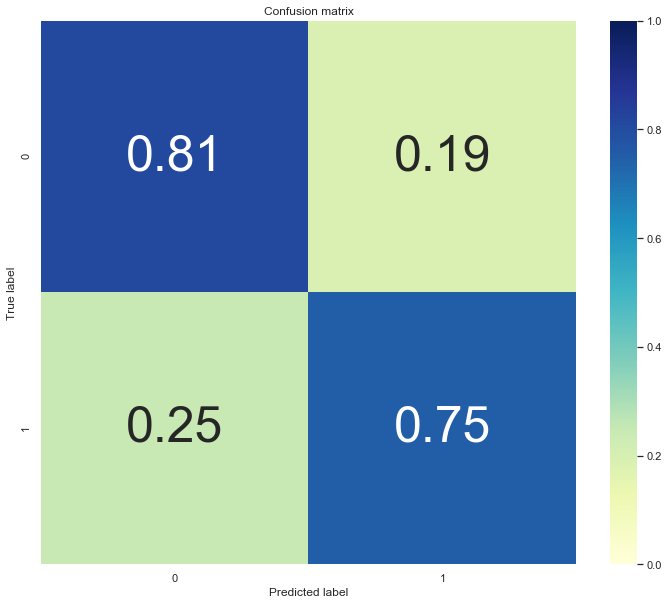

C:\Users\pitsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


The CA of C parameter 784.7599703514607 is 0.775:
The Logg Loss of C parameter 784.7599703514607 is 0.487454432011331:



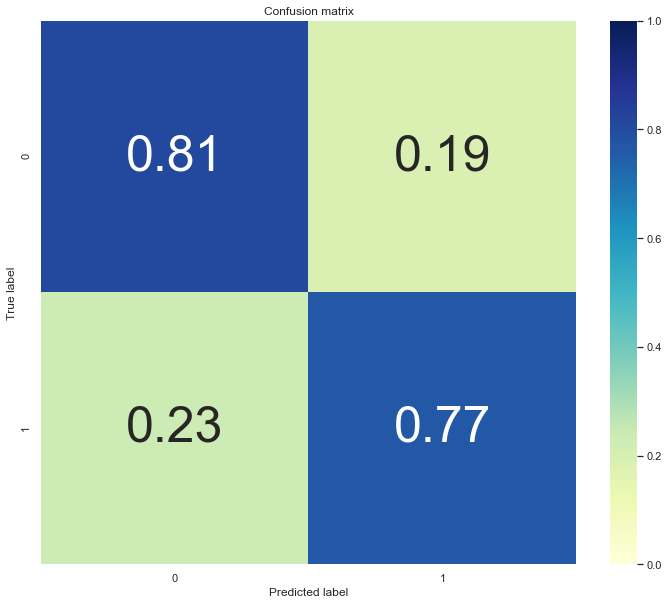

The CA of C parameter 2636.6508987303555 is 0.77:
The Logg Loss of C parameter 2636.6508987303555 is 0.49319255771029574:



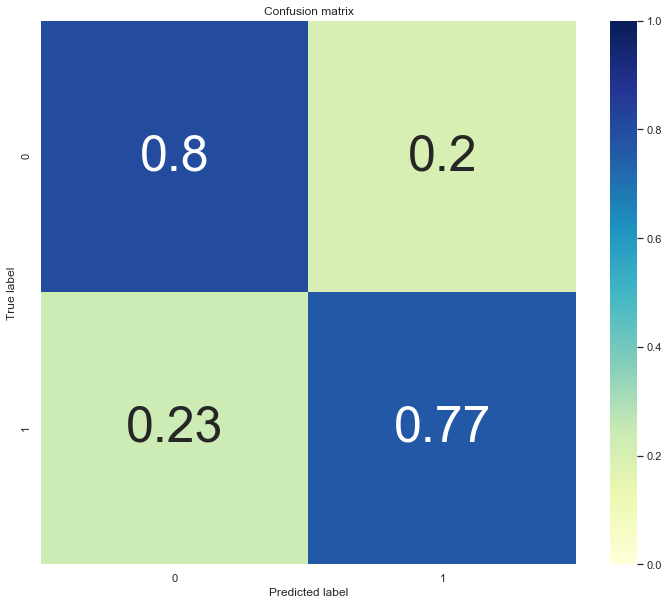

C:\Users\pitsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


The CA of C parameter 8858.667904100832 is 0.77:
The Logg Loss of C parameter 8858.667904100832 is 0.49322734852250816:



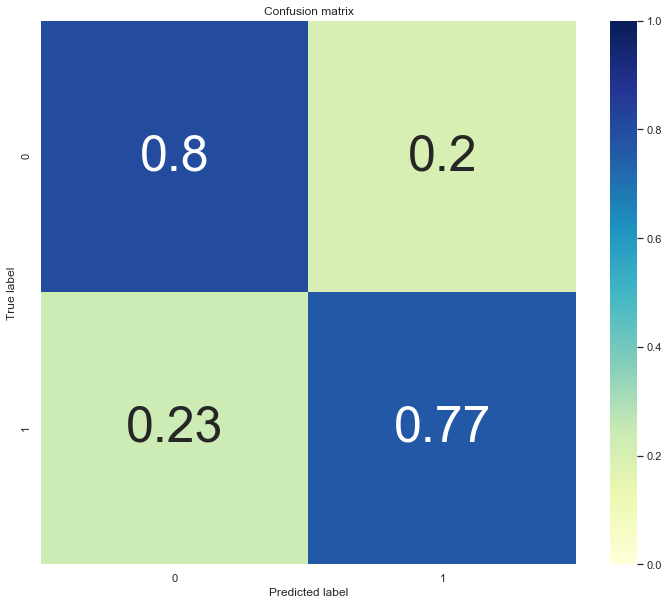

The CA of C parameter 29763.51441631313 is 0.77:
The Logg Loss of C parameter 29763.51441631313 is 0.4932018576228897:



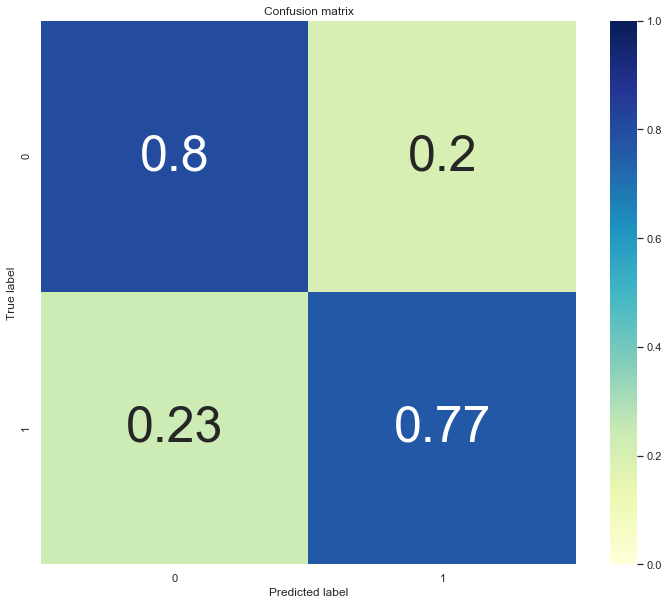

C:\Users\pitsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


The CA of C parameter 100000.0 is 0.77:
The Logg Loss of C parameter 100000.0 is 0.49325881164315516:



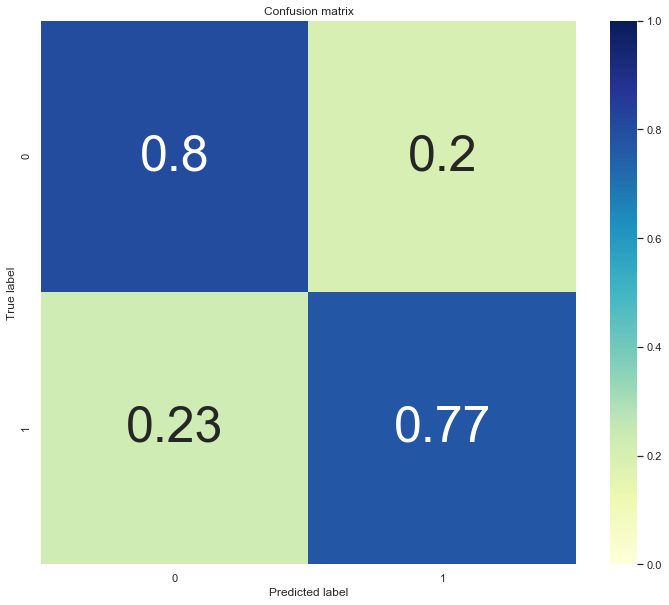

In [ ]:
# Maybe we have a different metric we want to track

# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")
    
    y_pred = log_reg2.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
    plt.show()
  

In [ ]:
# Training a Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)


# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

Testing Acc: 0.53
Log Loss: 16.233224905608022


## 11. Final Model with Selected Parameters

In [ ]:
# Final Model 

log_reg3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=784.759970)
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_valid, y_valid)

pred_proba_t = log_reg3.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

Testing Acc: 0.7625
Log Loss: 0.4331426430015858


C:\Users\pitsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## 12. How to use our L. Regression model

#### 

- Option 1: Deploy the model in a CRM System or the Cloud or Viz tools and automaticaly decide if a customer should get his loan approved or not


- Option 2: Analyse the factors that affect a good/bad loan and help the business understand this. Then the business can educate their clients what they need to improve in order to get a loan


- Option 3: Deploy this model in an open bank website where customers can automatically see if their loan will get approved or not; saving time & cost for the bank/business


- Option 4 - What do you think?